# **TR-05/2020 - Technical report: Descriptive of cardiovascular deaths**


|Technical Report ID  |2020/05|
|--|--|
| Title |Descriptive of cardiovascular deaths|
| Authors | Júlia De Lázari, Paula Dornhofer|
| Creation Date| 2020-12|


## Database description

**input:** obitos_circulatorio.csv

The database used for this analysis is the preprocessed database from SSC (Health Secretay of Campinas - Secretaria de Saúde de Campinas). It contains deaths due to cardiovascular ICDs from 2001 to 2019 (only data up to 2018 was used, to match the climate data). This dataframe contains 55155 rows and 13 columns (date, time, sex, age, ethnicity, city of occurence, city of residence, neighborhood of residence, the five lines of the death certificate indicating the cause and the ICD that lead to the classification as cardiovascular).

## Analysis

This report analyse the basic descriptive measures of number of deaths and frequency of deaths per sex, age, ICD, year, month and season.



## **Import libraries**

In [ ]:
#-------------------------------------------------------------------#
#                       Import libraries                            #
#-------------------------------------------------------------------#
import pandas as pd
import numpy as np
import pylab 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import PercentFormatter
from google.colab import drive
from google.colab import files

##**Load data**

In [ ]:
#-------------------------------------------------------------------#
#               Load dataframe - cirulatorio (SSC)                  #
#-------------------------------------------------------------------#

drive.mount('/content/drive')
df_obitos = pd.read_csv('obitos_circulatorio.csv')
df_obitos = df_obitos.drop(columns = {'Unnamed: 0','CODMUNRES','CODMUNOCOR','COMPLRES'}) #drop unneded columns
df_obitos['DTOBITO'] = pd.to_datetime(df_obitos['DTOBITO']) #date to datetime format
df_obitos = df_obitos[df_obitos['DTOBITO']<='2018-12-31'] #match the climate data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Descriptive measures**

Get basic descriptive measures of daily number of deaths.

In [ ]:
df_obitos['N_obitos'] = np.where(df_obitos['CID'].isnull(),0,df_obitos.groupby(['DTOBITO']).DTOBITO.transform('count'))

In [ ]:
summary = pd.DataFrame(round(df_obitos['N_obitos'].describe(),2))
summary

,N_obitos
count,55155.00
mean,9.49
std,3.06
min,1.00
25%,7.00
50%,9.00
75%,11.00
max,22.00


## **Distributions**

- frequency of sexes
- frequency of age groups
- frequency of cids
- deaths per year
- deaths per month
- deaths per season

In [ ]:
#-------------------------------------------------------------------#
#                         Frequency of sexes                        #
#-------------------------------------------------------------------#

#get the absolute value and percent for each sex
sex = pd.DataFrame(df_obitos['SEXO'].value_counts())
sex['Percent'] = sex['SEXO']/sex['SEXO'].sum()*100
sex['Percent'] = round(sex['Percent'],2)
sex = sex.rename(columns={'index':'Sex','SEXO':'Count'})
sex.head()

,Count,Percent
M,29025,52.62
F,26130,47.38


**Conclusion:** more man died due to cardiovascular conditions than woman in our dataset.

         Age group  Count  Percent
0      6 - Elderly  37463    67.92
1        5 - Adult  15351    27.83
2  4 - Young adult   1919     3.48
3        2 - Child    193     0.35
4     3 - Teenager    174     0.32
5       1 - Infant     55     0.10




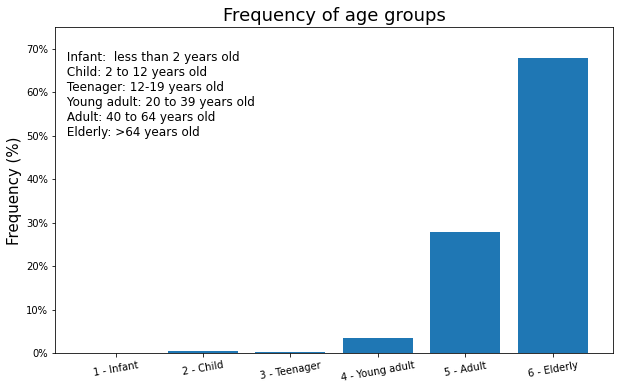

In [ ]:
#-------------------------------------------------------------------#
#                     Frequency of age groups                       #
#-------------------------------------------------------------------#

#caracterize age in age groups
#   infant: <2
#   child: 2-12
#   teenager: 12-19
#   young adult: 20-39
#   adult: 40-64
#   elderly: > 64

df_obitos.loc[df_obitos['IDADE'] < 2.0, 'Age group'] = '1 - Infant'
df_obitos.loc[(df_obitos['IDADE'] >=2.0) & (df_obitos['IDADE'] <= 12.0), 'Age group'] = '2 - Child'
df_obitos.loc[(df_obitos['IDADE'] >=13.0) & (df_obitos['IDADE'] <= 19.0), 'Age group'] ='3 - Teenager'
df_obitos.loc[(df_obitos['IDADE'] >=20.0) & (df_obitos['IDADE'] <= 39.0), 'Age group'] ='4 - Young adult'
df_obitos.loc[(df_obitos['IDADE'] >=40.0) & (df_obitos['IDADE'] <= 64.0), 'Age group'] ='5 - Adult'
df_obitos.loc[df_obitos['IDADE'] >64.0, 'Age group'] = '6 - Elderly'

#get absolute values and percent for each age group
age = pd.DataFrame(df_obitos['Age group'].value_counts())
age = age.reset_index()
age = age.sort_values(by=['index'])
age['Percent'] = age['Age group']/age['Age group'].sum()*100
age['Percent'] = round(age['Percent'],2)
age = age.rename(columns={'index':'Age group','Age group':'Count'})
print(age.sort_values('Percent',ascending=False))
print('\n')

#plot
plt.figure(figsize=(10,6))
plt.bar(age['Age group'],age['Percent'])
plt.xlabel('')
plt.ylabel('Frequency (%)',fontsize = 15)
plt.ylim(0,75)
plt.title('Frequency of age groups',fontsize = 18)
plt.text(-0.6,50,' Infant:  less than 2 years old \n Child: 2 to 12 years old \n Teenager: 12-19 years old \n Young adult: 20 to 39 years old \n Adult: 40 to 64 years old\n Elderly: >64 years old', fontsize = 12)
plt.xticks(rotation=10)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

**Conclusion:** the most affected age group was the elderly (>64 years old), followed by adults (40-64 years old) in this dataset.

     ICD  Count  Percent
0   I219  14350    26.02
1   I499   5156     9.35
2   I619   2882     5.23
3    I64   2719     4.93
4   I678   2629     4.77
5   I500   2283     4.14
6   I694   1942     3.52
7   I509   1540     2.79
8   I259   1373     2.49
9   I269   1340     2.43
10  I420   1234     2.24


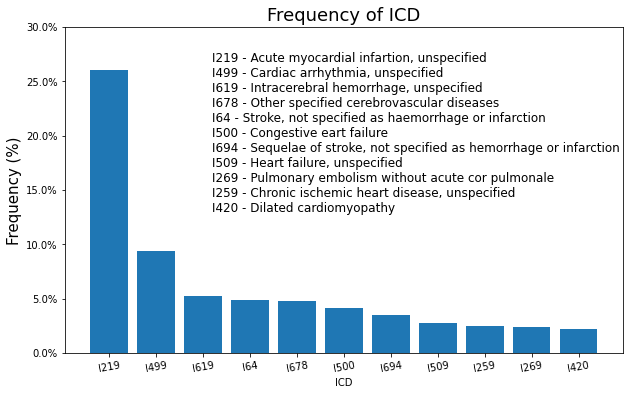

In [ ]:
#-------------------------------------------------------------------#
#        Frequency of ICDs - Specific (3 digit)                     #
#-------------------------------------------------------------------#

#possible ICDs
#print("Possible ICDs of cardiovascular diseases:",df_obitos['CID'].unique())
#print('\n')

#get absolute values and percent for each icd
cid = pd.DataFrame(df_obitos['CID'].value_counts())
cid = cid.reset_index()
cid = cid.sort_values(by=['index'])
cid['Percent'] = cid['CID']/cid['CID'].sum()*100
cid['Percent'] = round(cid['Percent'],2)
cid = cid[cid['Percent']>2.0] #get only the relevant percentage
cid = cid.rename(columns={'index':'ICD','CID':'Count'})
cid = cid.sort_values('Percent',ascending=False)
print(cid)

#meaning of each ICD

'''https://icd.who.int/browse10/2016/en#/I69.4'''

#plot
plt.figure(figsize=(10,6))
plt.bar(cid['ICD'],cid['Percent'])
plt.xlabel('ICD')
plt.ylabel('Frequency (%)',fontsize = 15)
plt.ylim(0,30)
plt.title('Frequency of ICD',fontsize = 18)
plt.text(2.2,13,'I219 - Acute myocardial infartion, unspecified \nI499 - Cardiac arrhythmia, unspecified \nI619 - Intracerebral hemorrhage, unspecified \nI678 - Other specified cerebrovascular diseases \nI64 - Stroke, not specified as haemorrhage or infarction \nI500 - Congestive eart failure \nI694 - Sequelae of stroke, not specified as hemorrhage or infarction \nI509 - Heart failure, unspecified  \nI269 - Pulmonary embolism without acute cor pulmonale \nI259 - Chronic ischemic heart disease, unspecified \nI420 - Dilated cardiomyopathy',fontsize=12)
plt.xticks(rotation=10)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

**Conclusion:** the most comum ICD was I219 (acute myocardial infartion), representing more than 1/4 of the deaths, followed by I499 (cardiac arrhythmia)

   ICD  Count  Percent
0  I21  14451    26.20
1  I49   5537    10.04
2  I50   4134     7.50
3  I25   3007     5.45
4  I64   2954     5.36
5  I61   2944     5.34
6  I67   2842     5.15


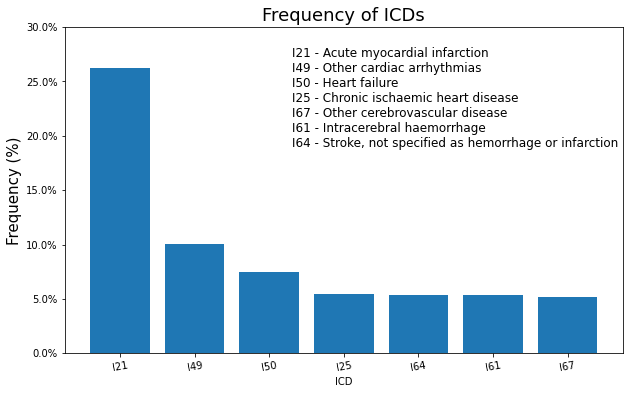

In [ ]:
#-------------------------------------------------------------------#
#          Frequency of ICD - General (first two digits)            #
#-------------------------------------------------------------------#

#get absolute values and percent for each icd
cid = pd.DataFrame(df_obitos['CID'].astype(str).str[0:3].value_counts())
cid = cid.reset_index()
cid = cid.sort_values(by=['index'])
cid['Percent'] = cid['CID']/cid['CID'].sum()*100
cid['Percent'] = round(cid['Percent'],2)
cid = cid[cid['Percent']>5.0] #get only the relevant percentage
cid = cid.rename(columns={'index':'ICD','CID':'Count'})
cid = cid.sort_values('Percent',ascending = False)
print(cid)

#meaning of each CID

'''https://icd.who.int/browse10/2016/en#/I49'''

#plot
plt.figure(figsize=(10,6))
plt.bar(cid['ICD'],cid['Percent'])
plt.xlabel('ICD')
plt.ylabel('Frequency (%)',fontsize = 15)
plt.ylim(0,30)
plt.title('Frequency of ICDs',fontsize = 18)
plt.text(2.3,19, 'I21 - Acute myocardial infarction \nI49 - Other cardiac arrhythmias \nI50 - Heart failure \nI25 - Chronic ischaemic heart disease \nI67 - Other cerebrovascular disease \nI61 - Intracerebral haemorrhage \nI64 - Stroke, not specified as hemorrhage or infarction',fontsize = 12)
plt.xticks(rotation=10)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

**Conclusion:** when grouping by a more general ICD the most common in the dataframe are I21 (Acute myocardial infarction), representing more than 1/4 of the dataset, and I49 (Other cardiac arrhythmias), with 1/10.

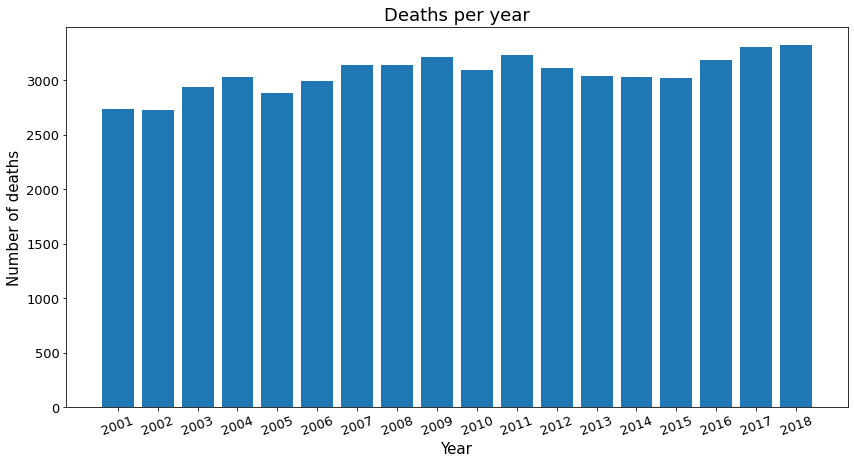

In [ ]:
#-------------------------------------------------------------------#
#                          Deaths per year                          #
#-------------------------------------------------------------------#

#get absolute value of deaths per year
year = pd.DataFrame(df_obitos['DTOBITO'].dt.strftime('%Y').value_counts())
year = year.reset_index()
year = year.sort_values(by=['index'])
year = year.rename(columns={'index':'Year','DTOBITO':'Count'})

#plot
plt.figure(figsize = (14,7))
plt.bar(year['Year'],year['Count'])
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Number of deaths',fontsize = 15)
plt.title('Deaths per year',fontsize=18)
plt.xticks(fontsize = 13, rotation = 20)
plt.yticks(fontsize = 13)
plt.show()

   Month  Count  Percent
11    02   4039     7.32
10    04   4246     7.70
9     12   4310     7.81
8     11   4316     7.83
7     03   4341     7.87
6     01   4359     7.90
5     10   4479     8.12
4     09   4715     8.55
3     05   4939     8.95
2     08   5038     9.13
1     06   5076     9.20
0     07   5297     9.60




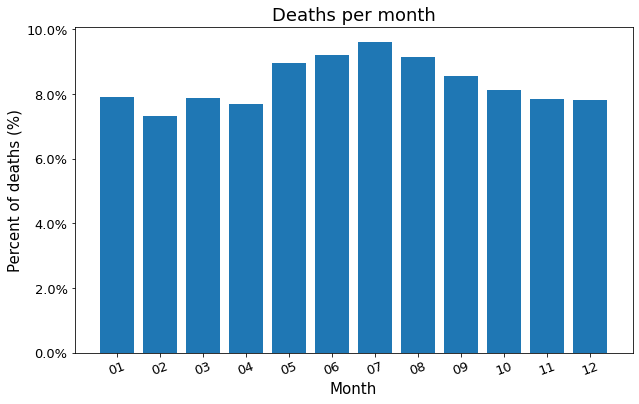

In [ ]:
#-------------------------------------------------------------------#
#                         Deaths per month                          #
#-------------------------------------------------------------------#

#get absolute value and percent of deaths per months
month = pd.DataFrame(df_obitos['DTOBITO'].dt.strftime('%m').value_counts())
month = month.reset_index()
month = month.sort_values(by=['index'])
month['Percent'] = month['DTOBITO']/month['DTOBITO'].sum()*100
month['Percent'] = round(month['Percent'],2)
month = month.rename(columns={'index':'Month','DTOBITO':'Count'})
print(month.sort_values('Percent'))
print('\n')

#plot
plt.figure(figsize=(10,6))
plt.bar(month['Month'],month['Percent'])
plt.xlabel('Month',fontsize = 15)
plt.ylabel('Percent of deaths (%)',fontsize = 15)
plt.title('Deaths per month',fontsize=18)
plt.xticks(fontsize = 13, rotation = 20)
plt.yticks(fontsize = 13)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

**Conclusion:** the months with more deaths were July and June. 

The month less deaths was February followed by April.

   Season  Count  Percent
1  Autumn  13526    24.52
2  Spring  13510    24.49
3  Summer  12708    23.04
0  Winter  15411    27.94




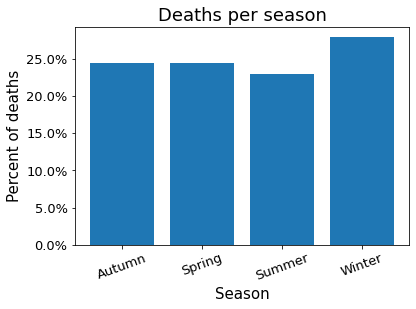

In [ ]:
#-------------------------------------------------------------------#
#                          Deaths per season                        #
#-------------------------------------------------------------------#

# create a column for season
summer = [12,1,2]
autumn = [3,4,5]
winter = [6,7,8]
spring = [9,10,11]

#create classification for season
df_obitos['Month'] = df_obitos['DTOBITO'].dt.strftime('%m').astype(int)
df_obitos.loc[df_obitos['Month'].isin(summer), 'Season'] = 'Summer'
df_obitos.loc[df_obitos['Month'].isin(autumn), 'Season'] = 'Autumn'
df_obitos.loc[df_obitos['Month'].isin(winter), 'Season'] = 'Winter'
df_obitos.loc[df_obitos['Month'].isin(spring), 'Season'] = 'Spring'

#get absolute value and percent of deaths per season
season = pd.DataFrame(df_obitos['Season'].value_counts())
season = season.reset_index()
season = season.sort_values(by=['index'])
season['Percent'] = season['Season']/season['Season'].sum()*100
season['Percent'] = round(season['Percent'],2)
season = season.rename(columns={'index':'Season','Season':'Count'})
print(season)
print('\n')

#plot
plt.bar(season['Season'],season['Percent'])
plt.xlabel('Season',fontsize = 15)
plt.ylabel('Percent of deaths',fontsize = 15)
plt.title('Deaths per season',fontsize=18)
plt.xticks(np.arange(0,4),fontsize = 13, rotation = 20)
plt.yticks(fontsize = 13)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

**Conlusion:** the season with more deaths was Winter, and the season with less deaths was Summer.